In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam


In [2]:
# Load MNIST data
(x_train, _), (_, _) = mnist.load_data()

# Normalize data
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=-1)

# GAN parameters
img_rows, img_cols, channels = 28, 28, 1
latent_dim = 100

# Generator model
generator = Sequential([
    Dense(128, input_dim=latent_dim),
    LeakyReLU(alpha=0.2),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(img_rows * img_cols * channels, activation='tanh'),
    Reshape((img_rows, img_cols, channels))
])

# Discriminator model
discriminator = Sequential([
    Flatten(input_shape=(img_rows, img_cols, channels)),
    Dense(512),
    LeakyReLU(alpha=0.2),
    Dense(256),
    LeakyReLU(alpha=0.2),
    Dense(1, activation='sigmoid')
])

In [3]:
# Compile discriminator
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(lr=0.0002, beta_1=0.5),
                      metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
gan_input = generator.input
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy',
            optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training GAN
batch_size = 64
epochs = 2000

2/2 [==============================] - 0s 0s/step
Epoch 0: [D loss: 0.7134592533111572, acc.: 39.84375%] [G loss: 0.8730963468551636]
1/1 [==============================] - 0s 99ms/step


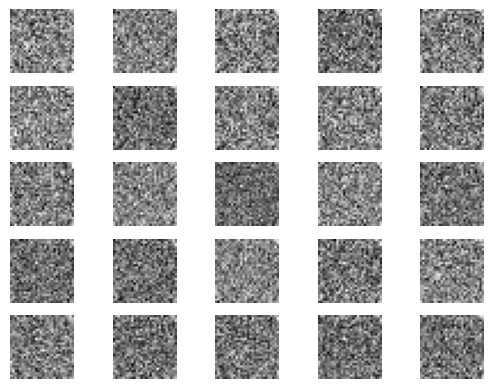

2/2 [==============================] - 0s 0s/step
Epoch 100: [D loss: 0.766572579741478, acc.: 38.28125%] [G loss: 0.8865314722061157]
2/2 [==============================] - 0s 6ms/step
Epoch 200: [D loss: 0.6692301630973816, acc.: 60.15625%] [G loss: 1.9570834636688232]
2/2 [==============================] - 0s 4ms/step
Epoch 300: [D loss: 0.5628460943698883, acc.: 71.09375%] [G loss: 1.8929587602615356]
2/2 [==============================] - 0s 0s/step
Epoch 400: [D loss: 0.5253109633922577, acc.: 71.875%] [G loss: 2.602572441101074]
2/2 [==============================] - 0s 0s/step
Epoch 500: [D loss: 0.4631934016942978, acc.: 77.34375%] [G loss: 2.263230562210083]
2/2 [==============================] - 0s 0s/step
Epoch 600: [D loss: 0.4145823121070862, acc.: 79.6875%] [G loss: 2.5604751110076904]
2/2 [==============================] - 0s 16ms/step
Epoch 700: [D loss: 0.43199479579925537, acc.: 78.125%] [G loss: 2.5566530227661133]
2/2 [==============================] - 0s 16ms/step

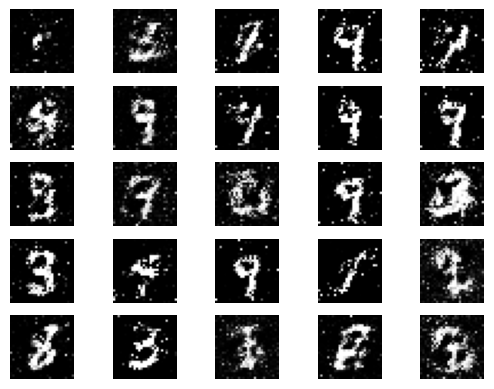

2/2 [==============================] - 0s 0s/step
Epoch 1100: [D loss: 0.5533118844032288, acc.: 69.53125%] [G loss: 2.2588257789611816]
2/2 [==============================] - 0s 6ms/step
Epoch 1200: [D loss: 0.4497916102409363, acc.: 79.6875%] [G loss: 2.0997955799102783]
2/2 [==============================] - 0s 8ms/step
Epoch 1300: [D loss: 0.5618662238121033, acc.: 72.65625%] [G loss: 1.9135669469833374]
2/2 [==============================] - 0s 5ms/step
Epoch 1400: [D loss: 0.6568117141723633, acc.: 62.5%] [G loss: 1.6118767261505127]
2/2 [==============================] - 0s 4ms/step
Epoch 1500: [D loss: 0.6540076434612274, acc.: 64.84375%] [G loss: 1.6800291538238525]
2/2 [==============================] - 0s 6ms/step
Epoch 1600: [D loss: 0.6185978353023529, acc.: 67.96875%] [G loss: 1.488803744316101]
2/2 [==============================] - 0s 19ms/step
Epoch 1700: [D loss: 0.5480483770370483, acc.: 67.96875%] [G loss: 1.658947467803955]
2/2 [==============================] - 0s

In [4]:
for epoch in range(epochs):
    # Select a random batch of images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_imgs = generator.predict(noise)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator (adversarial network)
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))  # Modified based on the topic
    g_loss = gan.train_on_batch(noise, valid_y)  # Modified based on the topic

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

        # Save and display generated images (Modified based on the topic)
        if epoch % 1000 == 0:
            r, c = 5, 5
            noise = np.random.normal(0, 1, (r * c, latent_dim))
            gen_imgs = generator.predict(noise) * 0.5 + 0.5
            fig, axs = plt.subplots(r, c)
            cnt = 0
            for i in range(r):
                for j in range(c):
                    axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                    axs[i, j].axis('off')
                    cnt += 1
            plt.show()